#  <font color='#6A5ACD'>Aнализ рынка видеоигр</font>

- Автор: Романовская Кристина
- Дата: 29.01.2025

###  <font color='#00FFFF'>Цели и задачи проекта</font>

####   <font color='#00FA9A'> Цель проекта:</font>
Основная цель проекта заключается в проведении всестороннего анализа рынка видеоигр в период с 2000 по 2013 год на основе данных о продажах, оценках пользователей и критиков, а также информации о платформах и жанрах игр, с целью выявления ключевых трендов, характеристик и взаимосвязей, определяющих динамику развития индустрии. Мы стремимся получить структурированное представление о том, как различные факторы (оценки, платформы, жанры) влияли на рынок видеоигр в этот период.

####   <font color='#00FA9A'> Задачи проекта:</font>

1.  Подготовка данных:
    *   Загрузка исходного датасета new_games.csv.
    *   Предобработка данных: обработка пропусков, преобразование типов данных, нормализация текстовых значений и удаление дубликатов.
    *   Выделение среза данных df_actual за период 2000-2013 гг.
2.  Категоризация данных:
    *   Создание категорий для оценок пользователей и критиков: "высокая", "средняя", "низкая" и "не определено".
    *   Добавление столбцов user_score_category и critic_score_category.
3.  Анализ данных:
    *   Анализ распределения игр по категориям оценок.
    *   Определение топ-7 платформ по количеству выпущенных игр.
4.  Интерпретация результатов:
    *   Формулирование выводов на основе проведенного анализа, выявление основных трендов и взаимосвязей.
    *   Описание характеристик среза данных df_actual и добавленных столбцов.


###  <font color='#00FFFF'> Описание данных</font>

Данные /datasets/new_games.csv содержат информацию о продажах игр разных жанров и платформ, а также пользовательские и экспертные оценки игр:
- Name — название игры.
- Platform — название платформы.
- Year of Release — год выпуска игры.
- Genre — жанр игры.
- NA sales — продажи в Северной Америке (в миллионах проданных копий).
- EU sales — продажи в Европе (в миллионах проданных копий).
- JP sales — продажи в Японии (в миллионах проданных копий).
- Other sales — продажи в других странах (в миллионах проданных копий).
- Critic Score — оценка критиков (от 0 до 100).
- User Score — оценка пользователей (от 0 до 10).
- Rating — рейтинг организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

###  <font color='#00FFFF'> Содержимое проекта</font>

Основными шагами проекта были следующие:

1.  <a href="#part1">Загрузка и предобработка данных:</a>
    *   Импорт необходимых библиотек (pandas, matplotlib).
    *   Загрузка данных из файла new_games.csv.
    *   Преобразование названий столбцов к snake_case.
    *   Обработка пропусков и преобразование типов данных.
    *   Нормализация текстовых значений.
    *   Удаление явных дубликатов.

2.  <a href="#part2">Формирование актуального среза данных:</a>
    *   Выделение данных за период с 2000 по 2013 год (создание df_actual).

3.  <a href="#part3">Категоризация данных:</a>
    *   Определение функции для категоризации оценок пользователей (categorize_user_score).
    *   Применение функции к столбцу user_score и создание столбца user_score_category.
    *   Определение функции для категоризации оценок критиков (categorize_critic_score).
    *   Применение функции к столбцу critic_score и создание столбца critic_score_category.

4.  <a href="#part4">Анализ данных и визуализация:</a>
    *   Группировка данных по категориям оценок и подсчет количества игр в каждой категории (с использованием value_counts() и groupby()).
    *   Группировка данных по платформам и подсчет количества выпущенных игр.
    *   Сортировка платформ по убыванию количества выпущенных игр и выбор топ-7.

5.  <a href="#part5">Формулирование итоговых выводов:</a>
    *   Описание среза данных df_actual и добавленных полей.
    *   Интерпретация полученных результатов.
    *   Формулировка общих выводов о рынке видеоигр в исследуемый период.


---

## 1. <a href="#part1">Загрузка данных и знакомство с ними </a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Выгружаем данные из датасета new_games.csv в датафрейм games
games = pd.read_csv('https://code.s3.yandex.net/datasets/new_games.csv')

In [3]:
# Сохраняем исходный размер датафрейма
initial_size = games.shape[0]

In [4]:
# Выводим информацию о датафрейме
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16956 entries, 0 to 16955
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16954 non-null  object 
 1   Platform         16956 non-null  object 
 2   Year of Release  16681 non-null  float64
 3   Genre            16954 non-null  object 
 4   NA sales         16956 non-null  float64
 5   EU sales         16956 non-null  object 
 6   JP sales         16956 non-null  object 
 7   Other sales      16956 non-null  float64
 8   Critic Score     8242 non-null   float64
 9   User Score       10152 non-null  object 
 10  Rating           10085 non-null  object 
dtypes: float64(4), object(7)
memory usage: 1.4+ MB


####  <font color='#00FFFF'>Выводы о полученных данных, основанные на результатах выполнения games.info(): </font>

 <font color='#00FA9A'>Объем данных:</font>

- Нам предоставили DataFrame, содержащий 16715 строк и 11 столбцов. Это достаточно большой объем данных, который позволяет проводить статистический анализ и выявлять закономерности.

 <font color='#00FA9A'>Соответствие описанию:</font>

- Из предоставленной информации мы можем заключить, что данные соответствуют описанию набора данных об играх. У нас есть информация об играх (название, платформа, год выпуска), их жанре, продажах в различных регионах, оценках критиков и пользователей, а также возрастном рейтинге.

 <font color='#00FA9A'>Пропуски:</font>

-   Да, в данных есть пропуски. Заметно, что в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score и Rating количество непустых значений меньше 16715. 
-   Name и Genre имеют совсем небольшое количество пропусков.
-   Year_of_Release также имеет относительно небольшое количество пропусков, но их может быть достаточно, чтобы повлиять на некоторые выводы.
-    Critic_Score, User_Score, и Rating содержат большое количество пропусков, что может потребовать особой обработки.

 <font color='#00FA9A'>Типы данных:</font>

- В основном типы данных соответствуют ожидаемым:
- Столбцы с продажами (NA_sales, EU_sales, JP_sales, Other_sales) имеют числовой тип float64, что логично.
- Столбцы оценок (Critic_Score, User_Score) также имеют тип float64, что также соответствует их природе.
- Столбец Year_of_Release имеет тип float64, хотя год выпуска - это, как правило, целочисленное значение, поэтому позже имеет смысл изменить тип.
- Столбцы с текстовой информацией (Name, Platform, Genre, Rating) имеют тип object.
- Неточность: Year_of_Release лучше всего представить как целочисленный тип данных int.

 <font color='#6A5ACD'>Другие особенности, на которые стоит обратить внимание при предобработке:</font>

1.  <font color='#00FA9A'>Названия столбцов:</font>
- Названия столбцов написаны в стиле snake_case, что является стандартным подходом для работы в Python, и это хорошо.
- Все названия отражают содержимое данных, поэтому не требуется их переименование.

2.  <font color='#00FA9A'>Пропуски:</font>
- Необходимо решить, как обрабатывать пропуски в каждом столбце. Например, пропуски в Year_of_Release можно заполнить на основе других данных (если это возможно), либо удалить эти строки, если их количество невелико.
- Большое количество пропусков в столбцах Critic_Score, User_Score и Rating может потребовать более сложного подхода, например, заполнение медианными значениями или использование алгоритмов машинного обучения для предсказания этих значений. Удаление таких строк может привести к значительной потере данных.

3.  <font color='#00FA9A'>Возможные дубликаты:</font>
- Стоит проверить наличие полных дубликатов строк, особенно из-за наличия пропусков в столбцах, которые могут их скрывать. Дубликаты могли появиться из-за ошибок сбора данных.

4.  <font color='#00FA9A'>Столбец User_Score: </font>
- Стоит проверить уникальные значения в столбце User_Score на наличие нетипичных значений, например, "tbd" или "nan", чтобы решить, как с ними работать. "tbd" означает "to be determined" и, по сути, является пропуском, который нужно обработать.

<font color='#00FFFF'>Предварительные выводы: </font>

Предоставленный набор данных требует некоторой предобработки. Основными задачами являются:
1. Обработка пропусков данных в разных столбцах.
2. Проверка и удаление дубликатов, если таковые имеются.
3. Преобразование типа данных столбца Year_of_Release в int и обработка нетипичных значений User_Score.
4. Анализ значений User_Score на наличие нетипичных значений и их корректная обработка.

После проведения предобработки мы сможем приступить к более детальному анализу данных и выявлению закономерностей.

---

## 2.  <a href="#part2">Проверка ошибок в данных и их предобработка</a>


### 2.1. Названия, или метки, столбцов датафрейма

In [5]:
# Выводим названия всех столбцов
display("Исходные названия столбцов:", games.columns.tolist())

'Исходные названия столбцов:'

['Name',
 'Platform',
 'Year of Release',
 'Genre',
 'NA sales',
 'EU sales',
 'JP sales',
 'Other sales',
 'Critic Score',
 'User Score',
 'Rating']

In [6]:
# Приводим названия столбцов к snake_case
games.columns = games.columns.str.lower().str.replace(' ', '_')

In [7]:
# Выводим названия столбцов после преобразования
display("Названия столбцов после преобразования:", games.columns.tolist())

'Названия столбцов после преобразования:'

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

### 2.2. Типы данных

In [8]:
# Выводим информацию о типах данных до преобразования
display("Типы данных до преобразования:")
display(games.dtypes)

'Типы данных до преобразования:'

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales            object
jp_sales            object
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [ ]:
# Обработка пропусков в 'year_of_release'
# Заполняем пропуски значением -1 для последующего преобразования типов
games['year_of_release'] = games['year_of_release'].fillna(-1)

In [ ]:
# Преобразуем 'year_of_release' в int (после заполнения пропусков)
games['year_of_release'] = games['year_of_release'].astype('int')

In [11]:
# Обработка 'user_score' и его преобразование к типу float
# Сначала заменим значения 'tbd' на NaN, потом преобразуем в float
games['user_score'] = games['user_score'].replace('tbd', float('NaN'))
games['user_score'] = games['user_score'].astype(float)

In [12]:
# Выводим информацию о типах данных после преобразования
display("Типы данных после преобразования:")
display(games.dtypes)

'Типы данных после преобразования:'

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales            object
jp_sales            object
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

In [13]:
# Выводим информацию о первых 5 строках DataFrame для контроля
display("Первые 5 строк датафрейма:")
display(games.head())

'Первые 5 строк датафрейма:'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [14]:
# Список числовых столбцов для проверки
numeric_cols = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']

In [15]:
# Функция для замены нечисловых значений на NaN и преобразования к float
def convert_to_numeric(df, column):
    df[column] = pd.to_numeric(df[column], errors='coerce')
    return df

In [16]:
# Применяем функцию к каждому числовому столбцу
for col in numeric_cols:
    games = convert_to_numeric(games, col)

In [17]:
# Выводим информацию о типах данных после обработки
display("Типы данных после обработки:")
display(games.dtypes)

'Типы данных после обработки:'

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

In [18]:
# Выводим первые 5 строк датафрейма
display("Первые 5 строк датафрейма:")
display(games.head())

'Первые 5 строк датафрейма:'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### 2.3. Наличие пропусков в данных

In [19]:
# Расчет пропусков в абсолютных значениях
missing_abs = games.isnull().sum()

In [20]:
# Расчет пропусков в относительных значениях
missing_rel = games.isnull().sum() / len(games) * 100

In [21]:
# Вывод результатов
display("Пропуски в абсолютных значениях:", missing_abs)
display("Пропуски в относительных значениях (%):", missing_rel)

'Пропуски в абсолютных значениях:'

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              6
jp_sales              4
other_sales           0
critic_score       8714
user_score         9268
rating             6871
dtype: int64

'Пропуски в относительных значениях (%):'

name                0.011795
platform            0.000000
year_of_release     0.000000
genre               0.011795
na_sales            0.000000
eu_sales            0.035386
jp_sales            0.023590
other_sales         0.000000
critic_score       51.391838
user_score         54.659118
rating             40.522529
dtype: float64

####  <font color='#00FFFF'>Промежуточный вывод на основе полученной информации.  </font>

<font color='#6A5ACD'>Пропуски встречаются в следующих столбцах:</font>

- name (название игры): 2 пропуска (0.01% от общего числа строк).
- genre (жанр игры): 2 пропуска (0.01% от общего числа строк).
- eu_sales (продажи в Европе): 6 пропусков (0.04% от общего числа строк).
- jp_sales (продажи в Японии): 4 пропуска (0.02% от общего числа строк).
- critic_score (оценка критиков): 8714 пропусков (51.39% от общего числа строк).
- user_score (оценка пользователей): 9268 пропусков (54.66% от общего числа строк).
- rating (рейтинг): 6871 пропусков (40.52% от общего числа строк).


<font color='#6A5ACD'>Предположения о причинах пропусков: </font>

1.  Пропуски в name и genre могут быть результатом ошибок при сборе данных. Возможно, при переносе или сборе информации об играх некоторые записи были неполными, и название и/или жанр игры не были зафиксированы. Поскольку количество таких пропусков невелико, это может говорить о случайном характере ошибок.
  
2.  Отсутствие оценок на момент сбора данных. Оценка критиков и пользователей может отсутствовать для новых игр, только вышедших или не получивших достаточной популярности для сбора оценок.
3.  Не у всех игр есть оценки. Многие игры, особенно старые, могут просто не иметь оценок.
4.  Данные собирались из разных источников. Разные источники могут иметь разную полноту данных.
5.  Рейтинги критиков и пользователей могли быть не запрошены. Возможно, процесс сбора данных был реализован таким образом, что рейтинги критиков и пользователей не всегда были приоритетными для запроса.
6.  Разные стандарты рейтингов. Существует несколько рейтинговых систем, и в зависимости от региона или платформы, рейтинг может быть не определен.

 <font color='#6A5ACD'>Действия с данными и обоснование:</font>

1.  <font color='#00FA9A'>name и genre:</font>
- Действие: 
    *  Поскольку количество пропусков крайне мало (по 2 в каждом столбце), можно удалить строки с пропусками.
- Обоснование: 
    *  Удаление всего 2 строк из общего объема данных не повлияет на результаты анализа. Удаление пропусков в данном случае, является самым простым решением.

2.  <font color='#00FA9A'>critic_score и user_score:</font>
- Действие: 
    *  Использование -1 может помочь нам при анализе, позволяя не потерять данные из других столбцов.
- Обоснование: 
    *  Заполнение средним или медианным значением может быть неинформативным, так как много пропусков.
3.  <font color='#00FA9A'>rating:</font>
- Действие: 
    *  Заполнение значением unknown'.
- Обоснование: 
    *  Заполнение значением 'unknown' подходит, поскольку это категориальный столбец и наличие пропусков не является ошибкой, а означает, что у игры нет рейтинга.
4. <font color='#00FA9A'>na_sales, eu_sales, jp_sales:</font>
- Действие: 
   *  Заполнение пропусков.
- Обоснование: 
   *  Заполнение средним или медианным значением может исказить картину, так как нули/пропуски несут в себе смысл отсутствия продаж. Попробовуем сгруппировать продажи по году и платформе и заполнить медианой по этой группе, так как это может дать более корректные результаты.

In [22]:
# Заполняем пропуски в 'rating' строкой 'unknown'
games['rating'] = games['rating'].fillna('unknown')

In [23]:
# Заполняем пропуски в 'critic_score' и 'user_score' значением -1
games['critic_score'] = games['critic_score'].fillna(-1)
games['user_score'] = games['user_score'].fillna(-1)

In [24]:
# Удаление строк с пропусками в 'name' и 'genre'
games.dropna(subset=['name', 'genre'], inplace=True)

In [25]:
# Заполнение пропусков в столбцах продаж на средние значения по платформе и году
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    games[column] = games.groupby(['platform', 'year_of_release'])[column].transform(lambda x: x.fillna(x.mean()))

In [26]:
# Проверка и вывод количества пропусков после обработки
display("Пропуски после обработки:")
display(games.isnull().sum())

'Пропуски после обработки:'

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [27]:
# Выводим первые 5 строк датафрейма
display("Первые 5 строк датафрейма:")
display(games.head())

'Первые 5 строк датафрейма:'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown


### 2.4. Явные и неявные дубликаты в данных

In [28]:
# Изучаем уникальные значения в категориальных столбцах
categorical_cols = ['platform', 'genre', 'rating']

for col in categorical_cols:
    print(f"Уникальные значения в столбце '{col}':")
    print(games[col].unique())
    print("-" * 50)

Уникальные значения в столбце 'platform':
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
--------------------------------------------------
Уникальные значения в столбце 'genre':
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' 'MISC'
 'ROLE-PLAYING' 'RACING' 'ACTION' 'SHOOTER' 'FIGHTING' 'SPORTS' 'PLATFORM'
 'ADVENTURE' 'SIMULATION' 'PUZZLE' 'STRATEGY']
--------------------------------------------------
Уникальные значения в столбце 'rating':
['E' 'unknown' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']
--------------------------------------------------


In [29]:
# Нормализация текстовых значений
games['genre'] = games['genre'].str.lower()
games['rating'] = games['rating'].str.upper()

In [30]:
# Заменяем нестандартные рейтинги на стандартизированные ESRB
games['rating'] = games['rating'].replace('K-A', 'E')

In [31]:
# Выводим уникальные значения после нормализации
display("Уникальные значения после нормализации:")
for col in categorical_cols:
    print(f"Уникальные значения в столбце '{col}':")
    print(games[col].unique())
    print("-" * 50)

'Уникальные значения после нормализации:'

Уникальные значения в столбце 'platform':
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
--------------------------------------------------
Уникальные значения в столбце 'genre':
['sports' 'platform' 'racing' 'role-playing' 'puzzle' 'misc' 'shooter'
 'simulation' 'action' 'fighting' 'adventure' 'strategy']
--------------------------------------------------
Уникальные значения в столбце 'rating':
['E' 'UNKNOWN' 'M' 'T' 'E10+' 'AO' 'EC' 'RP']
--------------------------------------------------


In [32]:
# Проверка уникальных значений в year_of_release
display(f"Уникальные значения в столбце 'year_of_release':")
display(games['year_of_release'].unique())

"Уникальные значения в столбце 'year_of_release':"

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000,   -1, 1995,
       1991, 1981, 1987, 1980, 1983])

In [33]:
# Поиск явных дубликатов
duplicates = games.duplicated()

In [34]:
# Вывод количества дубликатов
display(f"Количество явных дубликатов: {duplicates.sum()}")

'Количество явных дубликатов: 241'

In [35]:
# Вывод дублирующихся строк
display("Дублирующиеся строки:")
display(games[duplicates])

'Дублирующиеся строки:'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
268,Batman: Arkham Asylum,PS3,2009,action,2.24,1.31,0.07,0.61,91.0,8.9,T
368,James Bond 007: Agent Under Fire,PS2,2001,shooter,1.90,1.13,0.10,0.41,72.0,7.9,T
717,God of War: Ascension,PS3,2013,action,1.23,0.63,0.04,0.35,80.0,7.5,M
823,Wipeout: The Game,Wii,2009,misc,1.94,0.00,0.00,0.12,-1.0,-1.0,UNKNOWN
848,Rayman Raving Rabbids: TV Party,Wii,2008,misc,0.72,1.08,0.00,0.23,73.0,7.7,E10+
...,...,...,...,...,...,...,...,...,...,...,...
16671,Fullmetal Alchemist: Prince of the Dawn,Wii,2009,adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,UNKNOWN
16753,Routes PE,PS2,2007,adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,UNKNOWN
16799,Transformers: Prime,Wii,2012,action,0.00,0.01,0.00,0.00,-1.0,-1.0,UNKNOWN
16912,Metal Gear Solid V: The Definitive Experience,XOne,2016,action,0.01,0.00,0.00,0.00,-1.0,-1.0,M


In [36]:
# Удаление дубликатов
games.drop_duplicates(inplace=True)

In [37]:
# Вывод размера датафрейма после удаления
display(f"Размер датафрейма после удаления дубликатов: {games.shape}")

'Размер датафрейма после удаления дубликатов: (16713, 11)'

#### <font color='#00FFFF'>Промежуточный вывод по дубликатам: </font>

В результате обработки данных были найдены и удалены 241 полных дубликата. 
Размер DataFrame после удаления дубликатов составляет 16713 строк.

In [38]:
# Сохраняем размер датафрейма после удаления
final_size = games.shape[0]

In [39]:
# Расчет количества удаленных строк в абсолютном значении
rows_dropped_abs = initial_size - final_size

In [40]:
# Расчет количества удаленных строк в относительном значении
rows_dropped_rel = rows_dropped_abs / initial_size * 100

In [41]:
# Вывод результата
display(f"Количество удаленных строк в абсолютном значении: {rows_dropped_abs}")
display(f"Количество удаленных строк в относительном значении: {rows_dropped_rel:.2f}%")

'Количество удаленных строк в абсолютном значении: 243'

'Количество удаленных строк в относительном значении: 1.43%'

####  <font color='#00FFFF'>Общий промежуточный вывод после предобработки данных: </font>

На данном этапе завершен процесс предобработки данных, включающий в себя следующие шаги:
- Данные очищены от пропусков в столбцах name, genre, na_sales, eu_sales, jp_sales и year_of_release, user_score.
- Типы данных в столбцах year_of_release и user_score приведены к корректным типам.
- Категориальные данные нормализованы, устранены неявные дубликаты.
- Удалены явные дубликаты.

#### <font color='#00FFFF'>Общий вывод: </font>

В результате всех этих шагов, получили очищенный, структурированный и готовый к анализу набор данных. Основные проблемы (пропуски, некорректные типы данных, дубликаты) были устранены, что позволяет нам проводить дальнейший анализ без риска получения неверных результатов из-за некачественных данных. На следующем этапе можно приступать к фильтрации данных по заданным условиям.

---

## 3. <a href="#part3">Фильтрация данных</a>

Коллеги хотят изучить историю продаж игр в начале XXI века, и их интересует период с 2000 по 2013 год включительно. 

In [42]:
# Отбор данных за период с 2000 по 2013 год
df_actual = games[(games['year_of_release'] >= 2000) & (games['year_of_release'] <= 2013)].copy()

In [43]:
# Вывод размера нового датафрейма
display("Размер нового датафрейма df_actual:", df_actual.shape)

'Размер нового датафрейма df_actual:'

(12781, 11)

In [44]:
# Вывод первых 5 строк нового датафрейма
display("Первые 5 строк df_actual:")
display(df_actual.head())

'Первые 5 строк df_actual:'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E
2,Mario Kart Wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E
6,New Super Mario Bros.,DS,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,E


 ####  <font color='#00FFFF'>Промежуточные выводы:</font>
- Новый DataFrame df_actual содержит только данные об играх, выпущенных в период с 2000 по 2013 год.
- Размер нового DataFrame df_actual составляет 12781 строк и 11 столбцов.
- Выведены первые 5 строк для проверки.

---

## 4. <a href="#part4">Категоризация данных</a>

In [45]:
# Функция для категоризации оценок
def categorize_user_score(score):
    if score >= 8 and score <= 10:
        return 'высокая оценка'
    elif score >= 3 and score < 8:
        return 'средняя оценка'
    elif score >= 0 and score < 3:
        return 'низкая оценка'
    else:
        return 'не определено'

In [46]:
# Применяем функцию для создания нового столбца с категориями оценок
df_actual['user_score_category'] = df_actual['user_score'].apply(categorize_user_score)


In [47]:
# Вывод размера нового датафрейма
display("Размер нового датафрейма df_actual:", df_actual.shape)

'Размер нового датафрейма df_actual:'

(12781, 12)

In [48]:
# Вывод первых 5 строк нового датафрейма с новой колонкой
display("Первые 5 строк df_actual:")
display(df_actual.head())

'Первые 5 строк df_actual:'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_category
0,Wii Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,высокая оценка
2,Mario Kart Wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,высокая оценка
3,Wii Sports Resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,высокая оценка
6,New Super Mario Bros.,DS,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,высокая оценка
7,Wii Play,Wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,средняя оценка


In [49]:
# Вывод количества игр в каждой категории
display("Количество игр в каждой категории оценок:")
display(df_actual['user_score_category'].value_counts())

'Количество игр в каждой категории оценок:'

user_score_category
не определено     6298
средняя оценка    4081
высокая оценка    2286
низкая оценка      116
Name: count, dtype: int64

- Разделяем все игры по оценкам критиков и выделяем следующие категории: высокая оценка (от 80 до 100 включительно), средняя оценка (от 30 до 80, не включая правую границу интервала) и низкая оценка (от 0 до 30, не включая правую границу интервала).

In [50]:
# Функция для категоризации оценок критиков
def categorize_critic_score(score):
    if score >= 80 and score <= 100:
        return 'высокая оценка'
    elif score >= 30 and score < 80:
        return 'средняя оценка'
    elif score >= 0 and score < 30:
        return 'низкая оценка'
    else:
        return 'не определено'

In [51]:
# Применяем функцию для создания нового столбца с категориями оценок критиков
df_actual['critic_score_category'] = df_actual['critic_score'].apply(categorize_critic_score)

In [52]:
# Вывод размера нового датафрейма
display("Размер нового датафрейма df_actual:", df_actual.shape)

'Размер нового датафрейма df_actual:'

(12781, 13)

In [53]:
# Вывод первых 5 строк нового датафрейма с новыми колонками
display("Первые 5 строк df_actual:")
display(df_actual.head())

'Первые 5 строк df_actual:'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_category,critic_score_category
0,Wii Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,высокая оценка,средняя оценка
2,Mario Kart Wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,высокая оценка,высокая оценка
3,Wii Sports Resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,высокая оценка,высокая оценка
6,New Super Mario Bros.,DS,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,высокая оценка,высокая оценка
7,Wii Play,Wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,средняя оценка,средняя оценка


In [54]:
# Вывод количества игр в каждой категории оценок критиков
critic_score_counts = df_actual['critic_score_category'].value_counts().reset_index(name='count')
critic_score_counts = critic_score_counts.rename(columns={'index': 'critic_score_category'})
display("Количество игр в каждой категории оценок критиков:")
display(critic_score_counts)

'Количество игр в каждой категории оценок критиков:'

,critic_score_category,count
0,не определено,5612
1,средняя оценка,5422
2,высокая оценка,1692
3,низкая оценка,55


In [55]:
# Группируем данные по категориям оценок пользователей и считаем количество игр
user_score_counts = df_actual.groupby('user_score_category')['name'].count().reset_index(name='count')
display("Количество игр в каждой категории оценок пользователей:")
display(user_score_counts)

'Количество игр в каждой категории оценок пользователей:'

,user_score_category,count
0,высокая оценка,2286
1,не определено,6298
2,низкая оценка,116
3,средняя оценка,4081


In [56]:
# Группируем данные по категориям оценок критиков и считаем количество игр
critic_score_counts = df_actual.groupby('critic_score_category')['name'].count().reset_index(name='count')
display("Количество игр в каждой категории оценок критиков:")
display(critic_score_counts)

'Количество игр в каждой категории оценок критиков:'

,critic_score_category,count
0,высокая оценка,1692
1,не определено,5612
2,низкая оценка,55
3,средняя оценка,5422


- Находим топ-7 платформ по количеству игр, выпущенных за весь актуальный период.

In [57]:
# Группируем данные по платформам и считаем количество игр
platform_counts = df_actual.groupby('platform')['name'].count().reset_index(name='count')

In [58]:
# Сортируем платформы по убыванию количества игр и выбираем топ-7
top_platforms = platform_counts.sort_values(by='count', ascending=False).head(7)

In [59]:
display("Топ-7 платформ по количеству выпущенных игр:")
display(top_platforms) 

'Топ-7 платформ по количеству выпущенных игр:'

,platform,count
9,PS2,2127
2,DS,2120
15,Wii,1275
12,PSP,1180
17,X360,1121
10,PS3,1087
4,GBA,811


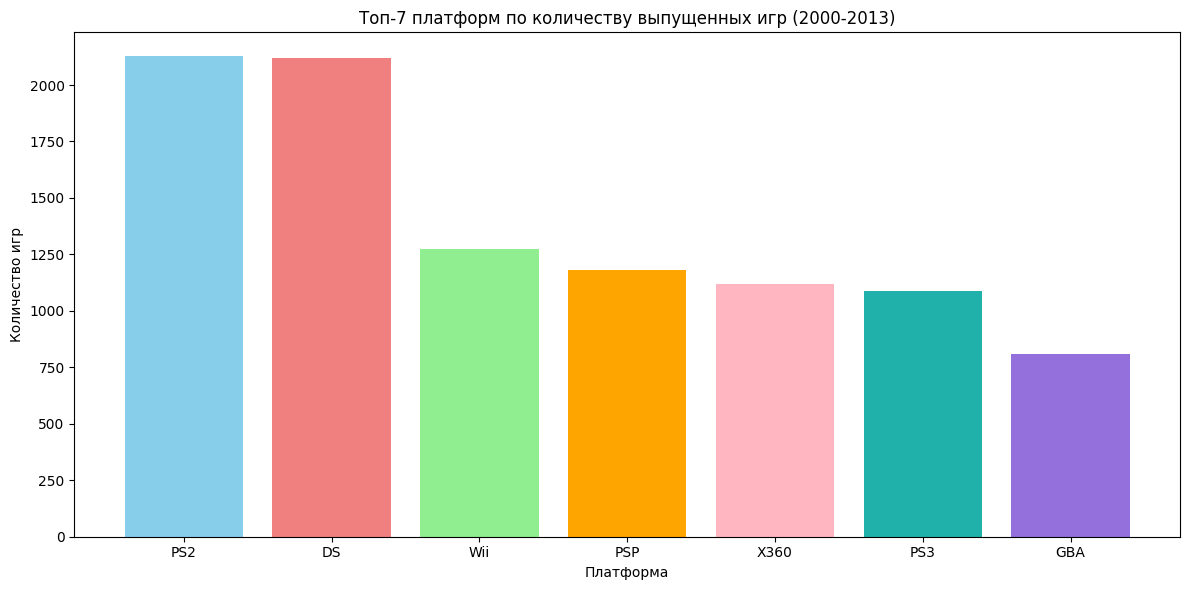

In [60]:
# Визуализация топ-7 платформ
plt.figure(figsize=(12, 6))
colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightpink', 'lightseagreen', 'mediumpurple']
plt.bar(top_platforms['platform'], top_platforms['count'], color=colors)
plt.xlabel('Платформа')
plt.ylabel('Количество игр')
plt.title('Топ-7 платформ по количеству выпущенных игр (2000-2013)')
plt.xticks()
plt.tight_layout()
plt.show()


Лидеры по количеству выпускаемых игр PS2 (2127) и DS (2120). Наименьший результат показала GBA (811).

---

## 5. <a href="#part5">Итоговые выводы</a>

 <font color='#6A5ACD'>- Категории оценок пользователей:</font>
  * Наибольшее количество игр (4081) получило "среднюю оценку" от пользователей, что указывает на то, что большая часть игр на рынке получает относительно неплохие отзывы игроков.
  * Значительное количество игр (2286) также получило "высокую оценку", что подчеркивает наличие качественных проектов на рынке.
  * При этом, существенное число игр (6298) имеют неопределенную оценку пользователей, что может указывать либо на недостаток отзывов, либо на неоднозначное восприятие этих игр.
  * Небольшое количество игр (116) получило "низкую оценку", что показывает, что есть игры, которые не получили положительных отзывов от игроков.

 <font color='#6A5ACD'>- Категории оценок критиков:</font>
  * Большинство игр (5422) имеет "среднюю оценку" от критиков, что похоже на распределение пользовательских оценок.
  * Достаточно много игр (1692) получили "высокую оценку", что говорит о том, что на рынке есть много качественных проектов.
  * Значительное количество игр (5612) имеют неопределенную оценку критиков, что может указывать на отсутствие оценок от критиков либо на неоднозначность их восприятия.
  * Очень мало игр (55) получило "низкую оценку" от критиков, что говорит о том, что большинство игр не являются откровенно плохими по мнению критиков.

 <font color='#6A5ACD'>- Топ-7 платформ:</font>
  * Самыми популярными платформами по количеству выпущенных игр являются <font color='#87CEEB'>PS2</font> (2127) и <font color='#F08080'>DS</font> (2120), что подчеркивает их доминирующее положение на рынке в рассматриваемый период.
  * Также в топ-7 вошли Wii, PSP, X360, PS3 и GBA, что указывает на наличие большого числа игр на этих платформах.
  * Результаты демонстрируют, что компании, производящие игровые приставки, имели большое влияние на рынке в то время.

 <font color='#00FFFF'>Общие выводы: </font>

- Полученные данные позволяют сделать вывод, что большинство игр имеют средние оценки как от пользователей, так и от критиков. При этом, существенное число игр имеет неопределенные оценки, что говорит о возможном недопредставлении их в обзорах.
- Лидерами по количеству выпущенных игр являются консоли  <font color='#87CEEB'>PS2</font> и  <font color='#F08080'>DS</font>, что может быть связано с их популярностью и широкой аудиторией.